<p  style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00008B; border-radius: 5px 5px;"><strong>FEATURE SELECTION METHOD</strong></p> 

In [5]:
# installing package

!pip install yellowbrick

In [6]:
# data manupulation
import pandas as pd
import numpy as np

#visualization liberaries
import matplotlib.pyplot as plt
import seaborn as sns

# setting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid')
%matplotlib inline

# feature selection method
from yellowbrick.model_selection import rfecv

# for model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/MODEL%20Validation%20Techniques/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Basic EDA

In [8]:
# checking null values

df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
# checking duplicated values

df.duplicated().sum()

13

In [10]:
# dropping duplicated values

df.drop_duplicates(inplace=True)

In [11]:
# cross checking

df.duplicated().sum()

0

In [12]:
# checking datatypes

df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

# defining x and y varibles

In [13]:
x = df.drop(columns=['fetal_health'])
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [14]:
y = df['fetal_health']
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2113, dtype: float64

<p  style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00008B; border-radius: 5px 5px;"><strong>RECURSIVE FEATURE ELEMENATION (RFE)</strong></p> 

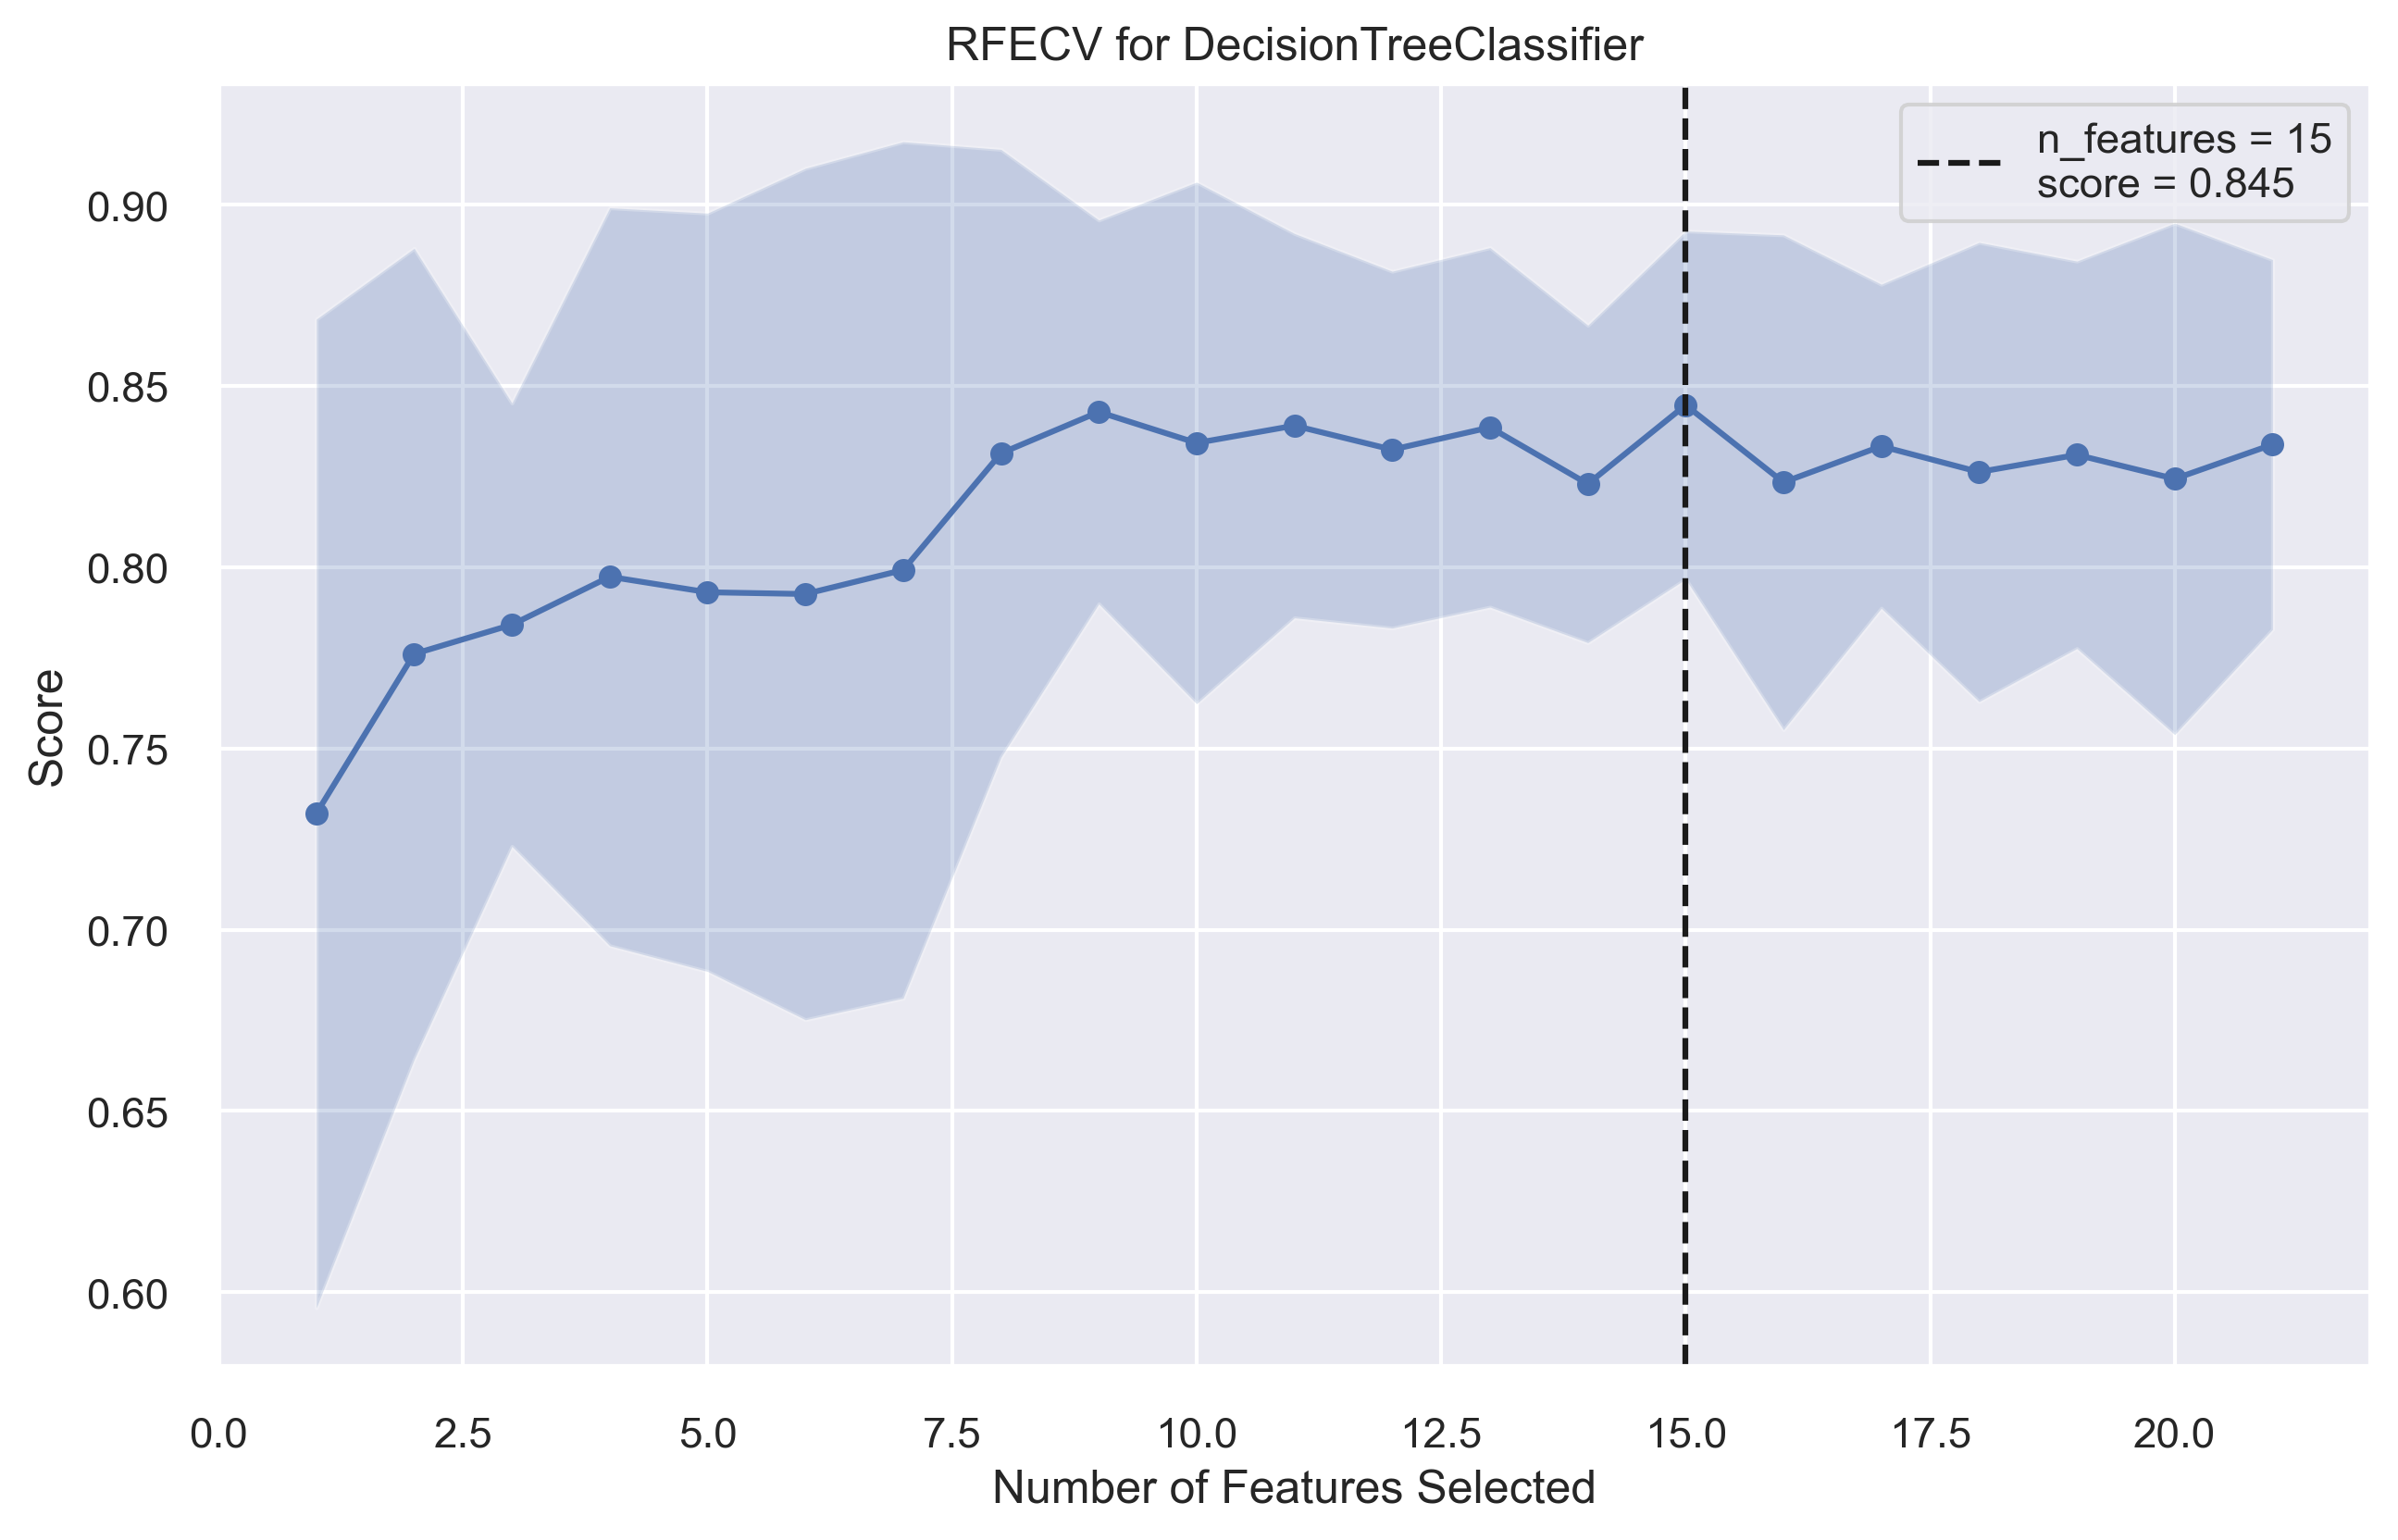

In [15]:
# creating instance for rfecv class
# passing all the data(independent features and target column)
# it eleminates features one by one and create model to train on that data then calculates accuracy of this model. It repeats same process
# it stores accuracy of each model for further comparisiomn to select which feature is important
# it will tell me how many features should be selected on the graph along with accuracy of the model if I select that number of features

rfe = rfecv(DecisionTreeClassifier(), x, y)

In [ ]:
# if I select 15 features then model's accuracy will be 84.5%
# if I select all features then it will give me almost similar results 
# but if I use rfecv time complexity and computational cost will get reduced 

In [16]:
# asking which features are important

rfe.ranking_

array([1, 1, 2, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 6, 1, 4])

labelled as 1 columns are the most important ones

In [17]:
# list of independent features

x.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [18]:
rfe_select = pd.DataFrame({
    'ranking' : rfe.ranking_,
    'features' : x.columns
})

In [21]:
# concerting to data frame datastructure to understand it better

rfe_select = rfe_select.sort_values(by='ranking')
rfe_select

,ranking,features
0,1,baseline value
17,1,histogram_mean
16,1,histogram_mode
14,1,histogram_number_of_peaks
13,1,histogram_max
12,1,histogram_min
11,1,histogram_width
19,1,histogram_variance
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability


In [23]:
# only important features by using pandas filtering

rfe_select[rfe_select['ranking']==1]

,ranking,features
0,1,baseline value
17,1,histogram_mean
16,1,histogram_mode
14,1,histogram_number_of_peaks
13,1,histogram_max
12,1,histogram_min
11,1,histogram_width
19,1,histogram_variance
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
